Einsum is all you need

domain과 상관없이 문법이 거의 똑같음.

# einsum :  
내부적으로 최적화 잘되어있는게 특징

In [1]:
import numpy as np

In [28]:
A = np.array([0, 1, 2]) 
B = np.array([[ 0, 1, 2, 3], [ 4, 5, 6, 7], [ 8, 9, 10, 11]]) 

In [13]:
A[:,np.newaxis].shape

(3, 1)

In [11]:
B.shape

(3, 4)

In [12]:
# expand_dim, 등등 dimention 추가 

In [15]:
(A[:, np.newaxis] * B)

array([[ 0,  0,  0,  0],
       [ 4,  5,  6,  7],
       [16, 18, 20, 22]])

In [14]:
(A[:, np.newaxis] * B).sum(axis=1)

array([ 0, 22, 76])

In [32]:
np.einsum('i,ij->i', A, B) # 가변 포지셔널 방식 

array([ 0, 22, 76])

### EXAMPLE

In [28]:
x = np.array([[1,2,3],[2,3,4]])

In [31]:
np.einsum('ij->',x)

15

In [10]:
a = np.arange(6).reshape(2, 3)

In [11]:
x = np.array([[1,2],[3,4]])

In [12]:
x

array([[1, 2],
       [3, 4]])

In [13]:
np.einsum('kj->j', x)

array([4, 6])

In [34]:
A = np.eye(10)
diag = np.einsum('ii->i', A) # 행렬의 값을 하나로 표시해라. 대각선에 있는 것들을 가져오라는 것.  ii->i 의 i가 결과값.즉 diag가 됨.
trace =np.einsum('ii->', A)
print(diag)
print(trace)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
10.0


In [2]:
a = np.arange(6).reshape(2,3)

In [3]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [4]:
a.T

array([[0, 3],
       [1, 4],
       [2, 5]])

In [5]:
np.einsum('ij->ji',a)

array([[0, 3],
       [1, 4],
       [2, 5]])

### MATRIX TRANSPOSE

In [6]:
np.einsum('ij->ji', a)

array([[0, 3],
       [1, 4],
       [2, 5]])

### SUM

In [7]:
np.einsum('ij->', a)   # matrix의 sum은 axis 개념이 있음

15

### COLUMN SUM

In [8]:
np.einsum('ij->j', a)

array([3, 5, 7])

In [9]:
np.sum(a,axis=0)   # 요거 헷갈림

array([3, 5, 7])

### ROW SUM

In [10]:
np.einsum('ij->i', a)

array([ 3, 12])

In [11]:
np.sum(a,axis=1)

array([ 3, 12])

### MATRIX-VECTOR MULTIPLICATION

In [33]:
a,b

(array([[0, 1, 2],
        [3, 4, 5]]), array([0, 1, 2]))

In [32]:
b = np.arange(3)
np.einsum('ik,k->i', a, b)   # a는 행렬, b는 vector 이므로 문자숫자 다름. 

array([ 5, 14])

### MATRIX-MATRIX MULTIPLICATION

3x4, 3x2 곱할수없다!
```
3x4, 4x2
  ====
```
같아야 함. 즉, ik, kj

In [44]:
a.shape

(2, 3)

In [45]:
b.shape

(3, 5)

In [46]:
b = np.arange(15).reshape(3, 5)
np.einsum('ik,kj->ij', a, b)

array([[ 25,  28,  31,  34,  37],
       [ 70,  82,  94, 106, 118]])

### DOT PRODUCT

In [47]:
b = np.arange(3)
c = np.arange(0,3)  # -- a vector of length 3 containing [3, 4, 5]
np.einsum('i,i->', b, c)

5

In [28]:
b = np.arange(6,12).reshape(2, 3)
np.einsum('ij,ij->', a, b)  # ij가 a, ij->에 b 대입

145

### HADAMARD(element-wise) PRODUCT

element-wise

In [48]:
b = np.arange(6,12).reshape(2, 3)
np.einsum('ij,ij->ij', a, b)

array([[ 0,  7, 16],
       [27, 40, 55]])

### OUTER PRODUCT (외적)


In [52]:
a,b

(array([0, 1, 2]), array([3, 4, 5, 6]))

In [51]:
a = np.arange(3)
b = np.arange(3,7)  # -- a vector of length 4 containing [3, 4, 5, 6]
np.einsum('i,j->ij', a, b)

array([[ 0,  0,  0,  0],
       [ 3,  4,  5,  6],
       [ 6,  8, 10, 12]])

### Matrix-Matrix Multiplication

In [39]:
## Matrix-Matrix Multiplication
A = np.array([[1,2,3], [4,5,6]])
B = A.transpose()
np.einsum('ik,kj->ij', A, B)

array([[14, 32],
       [32, 77]])

아래. 건너뜀.

### Batched Matrix multiplication

In [41]:
## Batched Matrix Multiplication
A = np.random.random(size=(3,10,4))
B = np.random.random(size=(3,4, 8))
np.einsum('bik,bkj->bij',A, B)

array([[[1.09131999, 1.11267239, 1.07739985, 0.37682274, 0.40284411,
         0.6765551 , 0.30194763, 1.55059707],
        [0.38042577, 0.2919755 , 0.4001977 , 0.29210307, 0.21768153,
         0.46609903, 0.3607877 , 0.69363685],
        [1.26497022, 1.15138082, 1.35109135, 0.64162533, 0.6443432 ,
         1.18663045, 0.81621308, 2.07974181],
        [1.44185304, 1.37516863, 1.5492458 , 1.03635248, 0.92222251,
         1.66766933, 0.93835697, 2.55844822],
        [1.59015676, 1.67469445, 1.90720121, 0.78905876, 1.13022065,
         1.71984561, 0.96606135, 2.7948405 ],
        [1.26822444, 1.15405794, 1.40619584, 0.66376571, 0.71793453,
         1.28736518, 0.90791154, 2.15884393],
        [0.68712149, 0.63798709, 0.98168636, 0.22063969, 0.58538501,
         0.87333882, 0.77526246, 1.33790117],
        [1.50741083, 1.46050584, 1.55904837, 1.03800209, 0.8767045 ,
         1.60030891, 0.8304519 , 2.56930514],
        [0.88586303, 0.86800433, 0.79215024, 0.32118979, 0.22401254,
         0.

### Quadritc Form, or Matrix norm, or Distance with respect to Matrix(Mahalanobis distance)

In [35]:
x = np.array([1,2,3])
y = np.array([-1,-2,-3])
A = np.random.random(size=(3, 3))

np.einsum('i,ij,j->', x, A, y)

-16.26311820047721

In [1]:
import matplotlib.pyplot as plt

파이 = 3.14, radian 개념으로는 파이=180도.

In [30]:
aa = np.array([[1,2,3],[3,2,1]])
bb = np.array([[3,4,5],[1,1,1]])

In [47]:
x, y = np.ogrid[0:100, 0:100]

In [74]:
mask = (x-50)**2 + (y-50)**2 >= 25**2

In [75]:
arr = np.ones((100,100))

In [80]:
arr[mask] = 255

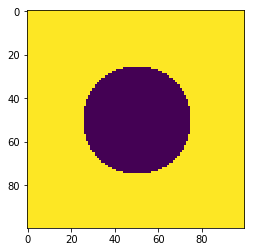

In [81]:
plt.imshow(arr)

In [67]:
a,b =np.einsum('...ij,...j', aa,bb) # ,는 곱해주는 것 

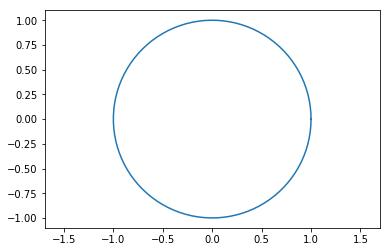

In [43]:
th = np.linspace(0,2*np.pi,100)
mats = np.array([[np.cos(th),np.sin(th)],[-np.sin(th),np.cos(th)]])
vecs = np.array([1,0])
vecs.repeat(100)
x, y = np.einsum('...ij,...i',mats,vecs)   # ...은 ALL
plt.plot(x,y)
plt.axes().set_aspect('equal','datalim')

In [6]:
a = np.ones(300, dtype=np.int8)

In [7]:
np.sum(a)

300

In [8]:
np.einsum('i->', a)

44

위 예에서 repeat  알아보기
### repeat VS tile

In [58]:
a = np.array([[1,2,3],[4,5,6]])

In [59]:
np.tile(a,(1,2))

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [13]:
a+3

array([[4, 5, 6],
       [7, 8, 9]])

R,G,B 3개채널에 가중치 곱할 때
가중치 세로 한줄만 알 때, 곱할 수 없음. 크기 맞추기 위해,
tile 기법으로 크기 맞춰주고 곱했음

In [14]:
np.repeat([3,4],3)

array([3, 3, 3, 4, 4, 4])

In [15]:
np.repeat([3,4],3,0)

array([3, 3, 3, 4, 4, 4])

In [16]:
np.repeat([3,4],3,1)   # 1차원이므로 axis 사용 안됨.

AxisError: axis 1 is out of bounds for array of dimension 1

In [17]:
np.repeat([3,4],3,-1) # 알아서 최고를 찾아주게 하는것 TIP: -1

array([3, 3, 3, 4, 4, 4])

In [18]:
np.tile(a,(2,3))

array([[1, 2, 3, 1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6, 4, 5, 6],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6, 4, 5, 6]])

In [22]:
np.repeat(a,3,1)

array([[1, 1, 1, 2, 2, 2, 3, 3, 3],
       [4, 4, 4, 5, 5, 5, 6, 6, 6]])

In [23]:
np.repeat(1,100)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
from skimage import data
# 연구자들이 많이 쓰므로 리서치 관점에서 쓰는 것이 많다.
# 실용적인 라이브러리는 PIL, opencv

In [62]:
dir(data)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binary_blobs',
 '_np',
 '_os',
 'astronaut',
 'binary_blobs',
 'camera',
 'checkerboard',
 'chelsea',
 'clock',
 'coffee',
 'coins',
 'data_dir',
 'expected_warnings',
 'horse',
 'hubble_deep_field',
 'img_as_bool',
 'immunohistochemistry',
 'imread',
 'lfw_subset',
 'load',
 'logo',
 'moon',
 'osp',
 'page',
 'rocket',
 'stereo_motorcycle',
 'text',
 'use_plugin',
 'warn']

In [64]:
data.astronaut()

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]